In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from utils_plot import *

process = ["transcription", "\u03B1"]
theta_smooth = np.round(np.linspace(0.01, 1.00, 100), 2)  # 100 bins from 0.01 to 1.00

# Load all model activities
A_split = np.load("activities_export/A_star_split.npy")
A_pytorch = np.load("activities_export/A_star_pytorch.npy")

tf_names_split = np.load(activities_export/"tf_names_split.npy", allow_pickle=True)
tf_names_pytorch = np.load("activities_export/tf_names_pytorch.npy", allow_pickle=True)

targetnames_split = np.load("activities_export/targetnames_split.npy", allow_pickle=True)
targetnames_pytorch = np.load("activities_export/targetnames_pytorch.npy", allow_pickle=True)

In [2]:
A_split = A_split - np.mean(A_split, axis=1, keepdims=True)
A_pytorch = A_pytorch - np.mean(A_pytorch, axis=1, keepdims=True)
#A_pytorch = A_pytorch - 0.5
A_pytorch_smooth = fourier_fit(A_pytorch, theta_smooth)

In [3]:
def standardize_amplitudes(matrices, target_amp=0.2):
    """
    Rescale the matrices to a single target amplitude.
    """
    standardized_matrices = []
    for matrix in matrices:
        amp = (np.max(matrix, axis=1) - np.min(matrix, axis=1)) / 2
        scale = target_amp / amp
        standardized_matrix = matrix * scale[:, np.newaxis]
        standardized_matrices.append(standardized_matrix)
    
    return standardized_matrices

In [4]:
if not (np.array_equal(tf_names_split, tf_names_pytorch) and
        np.array_equal(targetnames_split, targetnames_pytorch)):
    raise ValueError("Mismatch: TF names or target gene names do not match between split and PyTorch versions.")

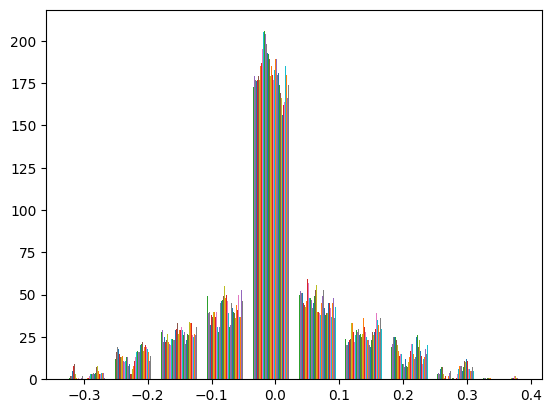

In [5]:
plt.hist(A_pytorch_smooth)
plt.show()

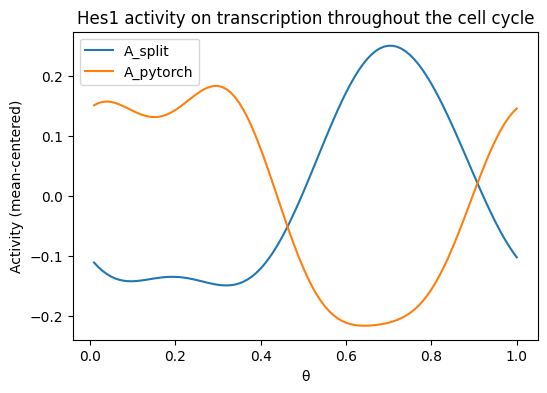

In [6]:
#Smad3, Hbp1, E2f1, E2f3, E2f4, E2f6, E2f7, E2f8, Sp1, Hes1
A_split, A_pytorch_smooth = standardize_amplitudes([A_split, A_pytorch_smooth])
BP_nb = np.where(tf_names_split == 'Hes1')[0][0]
plot_binding_protein_activity(tf_names_split, [(A_split, "A_split"), (A_pytorch_smooth, "A_pytorch")], process, theta_smooth, BP_nb=BP_nb)

In [ ]:
%

In [9]:
n_tfs = A_split.shape[0]
corrs_A = np.zeros(n_tfs)
for m in range(n_tfs):
    corrs_A[m], _ = pearsonr(A_split[m, :], A_pytorch_smooth[m, :])
print("Mean correlation of TF activities:       ", round(np.mean(corrs_A), 3))
print("Median correlation of TF activities:     ", round(np.median(corrs_A), 3))
pearsonr(A_split, A_pytorch_smooth)

Mean correlation of TF activities:        -0.011
Median correlation of TF activities:      -0.028


PearsonRResult(statistic=array([ 0.01432046,  0.01196957,  0.01110132,  0.01148021,  0.01269369,
        0.01422403,  0.01554387,  0.0162096 ,  0.01592598,  0.01456779,
        0.01216169,  0.00884445,  0.0048165 ,  0.00030382, -0.00446637,
       -0.00927753, -0.01392713, -0.01822616, -0.02199916, -0.02508862,
       -0.02736701, -0.02875821, -0.02926706, -0.02900965, -0.02822923,
       -0.02727865, -0.02655848, -0.0264232 , -0.02709302, -0.02860971,
       -0.03084853, -0.03356764, -0.03646607, -0.03923123, -0.04157146,
       -0.0432379 , -0.04404217, -0.04387419, -0.04272074, -0.04068119,
       -0.03797409, -0.03492741, -0.03194736, -0.0294664 , -0.0278778 ,
       -0.02747096, -0.02838406, -0.03058702, -0.03389743, -0.03802102,
       -0.04260162, -0.04726626, -0.05165718, -0.05544893, -0.0583534 ,
       -0.06011732, -0.06051678, -0.05935329, -0.05645526, -0.05168944,
       -0.04498662, -0.03638488, -0.02608992, -0.01454288, -0.00247152,
        0.0091146 ,  0.01902594,  0.026

In [8]:
corrs_A

array([-0.32635208, -0.24189598, -0.26554275,  0.1703328 , -0.79146671,
        0.09160689,  0.25165467, -0.51210417, -0.92410508,  0.77173875,
        0.37483674,  0.736688  , -0.85219938,  0.38559515, -0.97428187,
       -0.57046389, -0.53940122, -0.83982746,  0.60975953, -0.04026822,
       -0.15149913,  0.06612654,  0.91160326, -0.14662597,  0.01971675,
        0.66027424, -0.70358404, -0.35911492, -0.35238884, -0.30865902,
        0.37491266, -0.55702637,  0.44974985,  0.12088617, -0.16068218,
        0.03897444, -0.09121767,  0.43733447,  0.54100676,  0.19378535,
        0.3065546 , -0.87104953, -0.05573072, -0.79308802,  0.8687043 ,
       -0.82423259,  0.71094123,  0.00191926,  0.89195941, -0.94854789,
        0.43922015, -0.40256325, -0.87975536, -0.76155903, -0.15474155,
       -0.55250544,  0.82129112,  0.80363529, -0.92219795,  0.01317883,
       -0.24071361,  0.53248033,  0.13022025,  0.57226792,  0.45232854,
       -0.6258318 ,  0.05023753, -0.28857941,  0.10686119,  0.93